In [1]:
#import sys
#!{sys.executable} -m pip install --upgrade c-lasso 
from classo import *
import zarr
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Data 

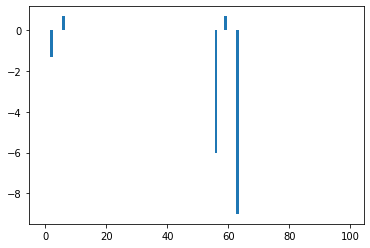

array([ 2,  6, 56, 59, 63])

In [2]:
m,d,d_nonzero,k,sigma =150,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=False,seed=None)
plt.bar(range(len(sol)),sol)
plt.show()

np.arange(len(sol))[sol !=0.]

In [3]:
print("lambdamax = ", max(abs(X.T.dot(y))))

lambdamax =  1347.2311539883567


## Problems

In [4]:
problem = classo_problem(X,y,C=C)
problem.model_selection.PATH = True
problem.model_selection.CV = True
problem.model_selection.StabSel = True
problem.model_selection.LAMfixed = True

problem.formulation.w = np.array([2.]*40+ [1.]*(d-40))

problem1 = deepcopy(problem)
problem2 = deepcopy(problem)
problem3 = deepcopy(problem)

### Path 

In [5]:
param = problem1.model_selection.PATHparameters
param.numerical_method = ' '
param.n_active = 20
param.lambdas = np.linspace(1.,1e-3,50)

In [6]:
param = problem2.model_selection.PATHparameters
param.numerical_method = 'P-PDS'
param.n_active = 0
param.lambdas = np.linspace(1.,1e-1,50)

In [7]:
param = problem3.model_selection.PATHparameters
param.numerical_method = 'DR'
param.n_active = 0
param.lambdas = np.linspace(1.,1e-1,20)

### Cross validation 

In [8]:
param = problem1.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 5
param.oneSE = True
param.lambdas = np.linspace(1.,1e-3,80)

In [9]:
param = problem2.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 7
param.oneSE = False
param.lambdas = np.linspace(1.,1e-3,80)

In [10]:
param = problem3.model_selection.CVparameters
param.seed = 2
param.numerical_method = 'P-PDS'
param.Nsubset = 3
param.oneSE = True
param.lambdas = np.linspace(1.,1e-1,20)

### Stability Selection

In [11]:
param = problem1.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'first'
param.B = 50
param.q = 10
param.percent_nS = 0.5
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.7 
param.threshold_label = 0.2

In [12]:
param = problem2.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'max'
param.B = 70
param.q = 20
param.percent_nS = 0.8
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.5 
param.threshold_label = 0.2

In [13]:
param = problem3.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'lam'
param.B = 50
param.q = 1000
param.percent_nS = 0.4
param.lamin = 1.
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.8
param.threshold_label = 0.2

### Lambda fixed 

In [14]:
param = problem1.model_selection.LAMfixedparameters
param.numerical_method = 'P-PDS'
param.lam = 'theoretical'
param.true_lam = True

In [15]:
param = problem2.model_selection.LAMfixedparameters
param.numerical_method = 'DR'
param.lam = 0.1
param.true_lam = False

In [16]:
param = problem3.model_selection.LAMfixedparameters
param.numerical_method = ' '
param.lam = 0.
param.true_lam = True

## R1

In [17]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = False

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 5
     lamin = 0.001
     n_lam = 80
     numerical_method = Path-Alg
 
STABILITY SELECTION PARAMETERS: 
     method = first
     lamin = 0.01
     lam = theoretical
     Nlam = 80
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = theoretical
     theoretical_lam = 24.421
     numerical_method = P-PDS
 
PATH PARAMETERS: 
     Npath = 50
     n_active = 20
     lamin = 0.001
     numerical_method = Path-Alg



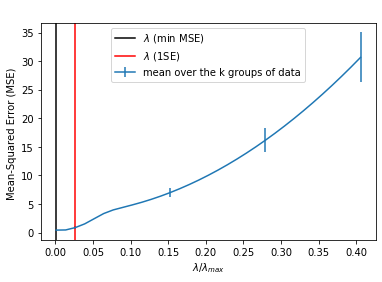

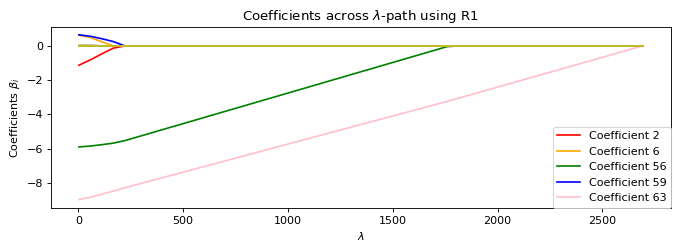

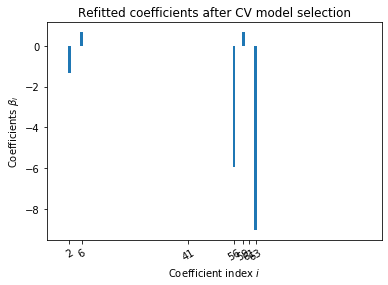

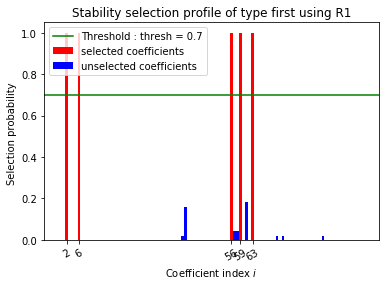

SELECTED VARIABLES : 
2
6
56
59
63


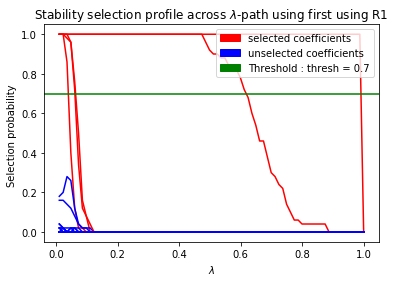

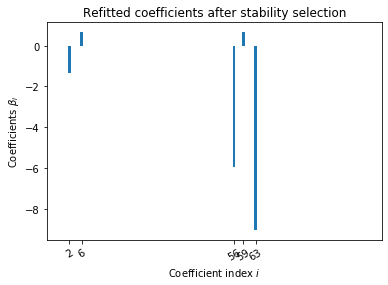

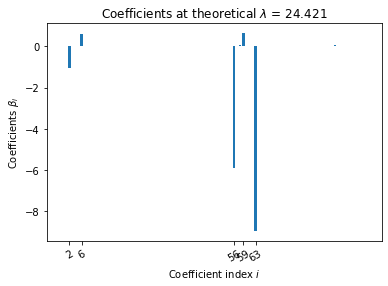

Running time : 
Running time for Path computation    : 0.026s
Running time for Cross Validation    : 0.331s
Running time for Stability Selection : 0.749s
Running time for Fixed LAM           : 0.012s
 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 7
     lamin = 0.001
     n_lam = 80
     numerical_method = Path-Alg
 
STABILITY SELECTION PARAMETERS: 
     method = max
     lamin = 0.01
     lam = theoretical
     Nlam = 80
     B = 70
     q = 20
     percent_nS = 0.8
     threshold = 0.5
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = 0.1
     theoretical_lam = 0.1628
     numerical_method = DR
 
PATH PARAMETERS: 
     Npath = 50
     n_active = 0
     lamin = 0.1
     numerical_method = P-PDS



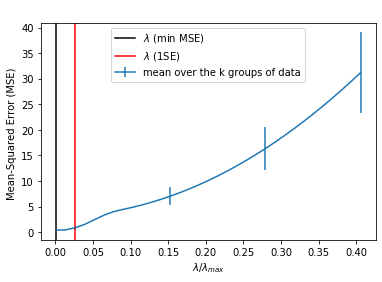

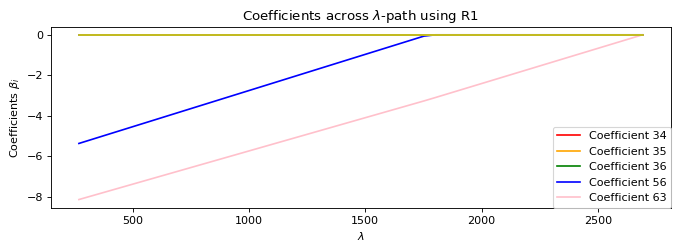

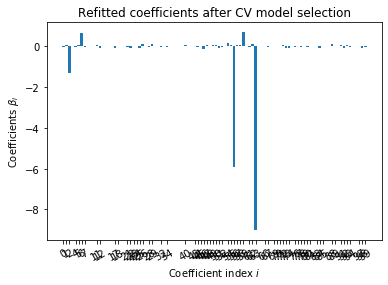

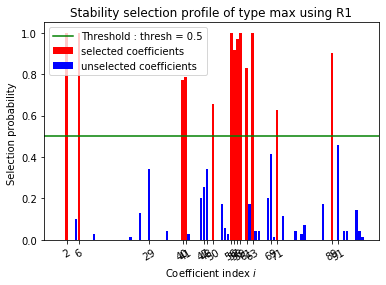

SELECTED VARIABLES : 
2
6
40
41
50
56
57
58
59
61
63
71
89


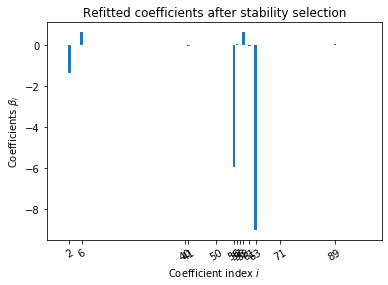

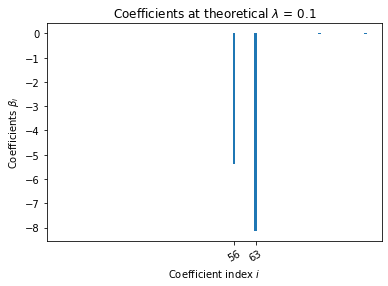

Running time : 
Running time for Path computation    : 0.141s
Running time for Cross Validation    : 0.81s
Running time for Stability Selection : 1.254s
Running time for Fixed LAM           : 0.093s
 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 3
     lamin = 0.1
     n_lam = 20
     numerical_method = P-PDS
 
STABILITY SELECTION PARAMETERS: 
     method = lam
     lamin = 1.0
     lam = theoretical
     Nlam = 80
     B = 50
     q = 1000
     percent_nS = 0.4
     threshold = 0.8
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = 0.0
     theoretical_lam = 24.421
     numerical_method = DR
 
PATH PARAMETERS: 
     Npath = 20
     n_active = 0
     lamin = 0.1
     numerical_method = DR



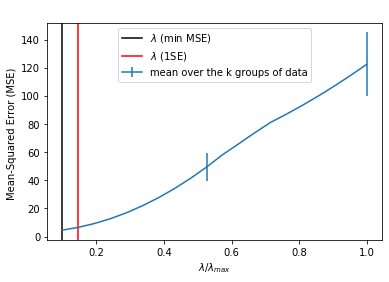

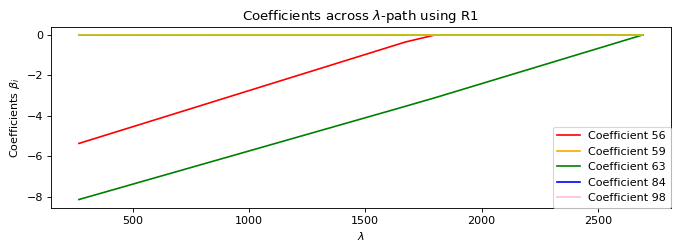

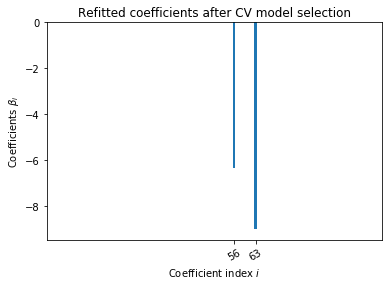

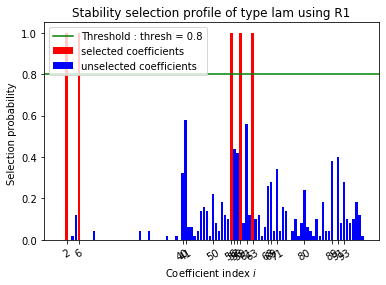

SELECTED VARIABLES : 
2
6
56
59
63


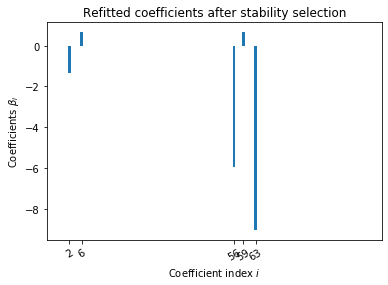

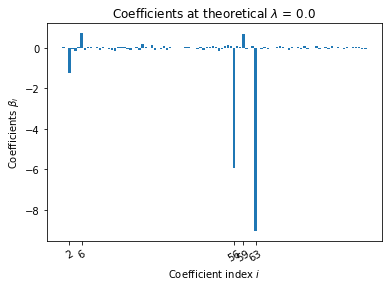

Running time : 
Running time for Path computation    : 0.471s
Running time for Cross Validation    : 0.19s
Running time for Stability Selection : 0.688s
Running time for Fixed LAM           : 0.002s


In [18]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(ratio_mse_max = 10.)
print(problem1.solution)

problem2.solve()
print(problem2)
problem2.solution.CV.graphic(ratio_mse_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(ratio_mse_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [19]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## R2

In [20]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = False

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 5
     lamin = 0.001
     n_lam = 80
     numerical_method = Path-Alg
 
STABILITY SELECTION PARAMETERS: 
     method = first
     lamin = 0.01
     lam = theoretical
     Nlam = 80
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = theoretical
     theoretical_lam = 24.421
     numerical_method = P-PDS
 
PATH PARAMETERS: 
     Npath = 50
     n_active = 20
     lamin = 0.001
     numerical_method = Path-Alg



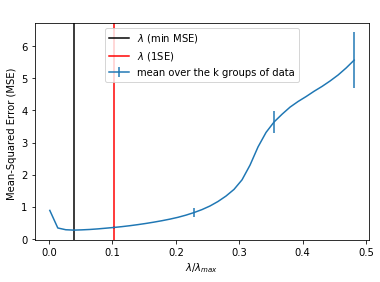

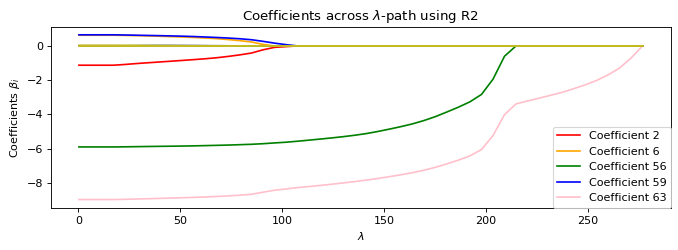

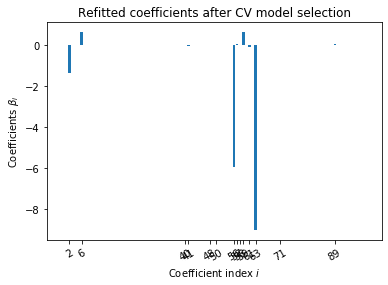

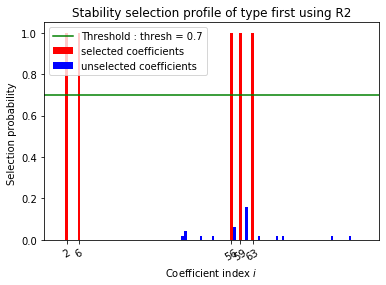

SELECTED VARIABLES : 
2
6
56
59
63


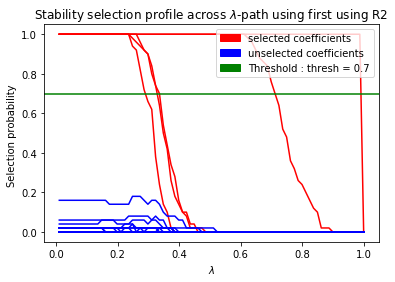

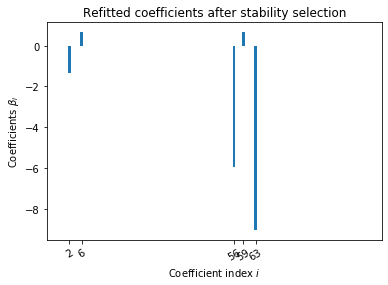

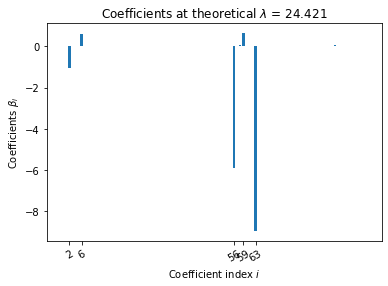

Running time : 
Running time for Path computation    : 0.289s
Running time for Cross Validation    : 2.478s
Running time for Stability Selection : 4.857s
Running time for Fixed LAM           : 0.013s
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 7
     lamin = 0.001
     n_lam = 80
     numerical_method = Path-Alg
 
STABILITY SELECTION PARAMETERS: 
     method = max
     lamin = 0.01
     lam = theoretical
     Nlam = 80
     B = 70
     q = 20
     percent_nS = 0.8
     threshold = 0.5
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = 0.1
     theoretical_lam = 0.1628
     numerical_method = DR
 
PATH PARAMETERS: 
     Npath = 50
     n_active = 0
     lamin = 0.1
     numerical_method = P-PDS



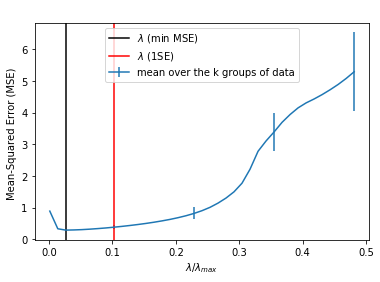

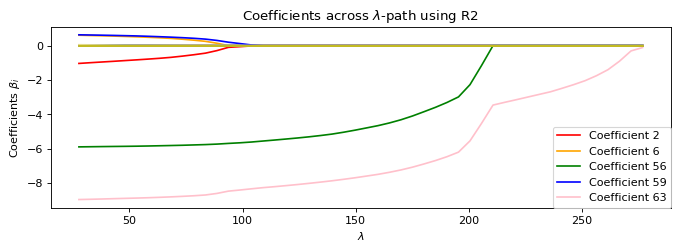

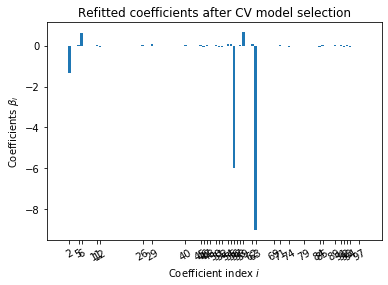

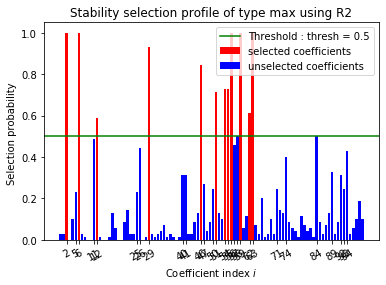

SELECTED VARIABLES : 
2
6
12
29
46
51
54
55
56
59
62
63


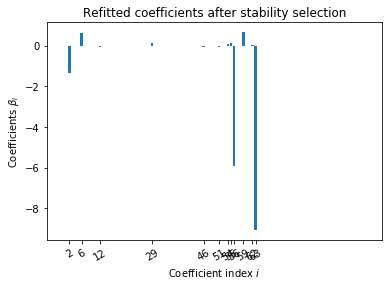

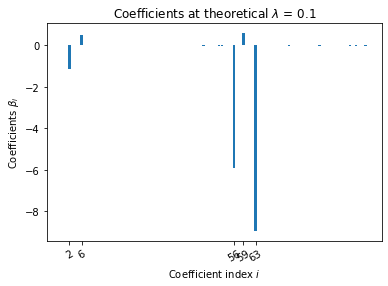

Running time : 
Running time for Path computation    : 3.222s
Running time for Cross Validation    : 2.91s
Running time for Stability Selection : 19.84s
Running time for Fixed LAM           : 0.158s
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 3
     lamin = 0.1
     n_lam = 20
     numerical_method = P-PDS
 
STABILITY SELECTION PARAMETERS: 
     method = lam
     lamin = 1.0
     lam = theoretical
     Nlam = 80
     B = 50
     q = 1000
     percent_nS = 0.4
     threshold = 0.8
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = 0.0
     theoretical_lam = 24.421
     numerical_method = Path-Alg
 
PATH PARAMETERS: 
     Npath = 20
     n_active = 0
     lamin = 0.1
     numerical_method = DR



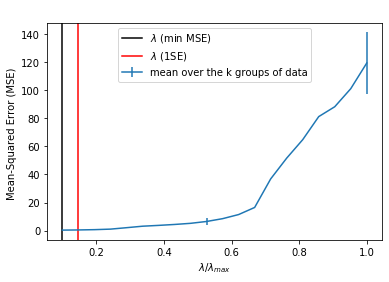

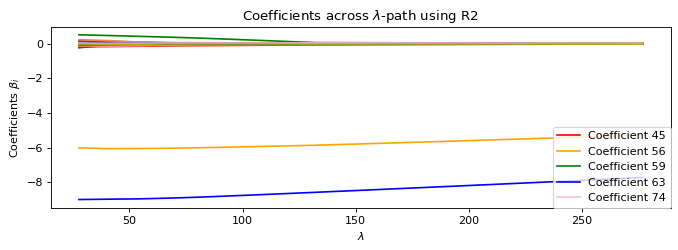

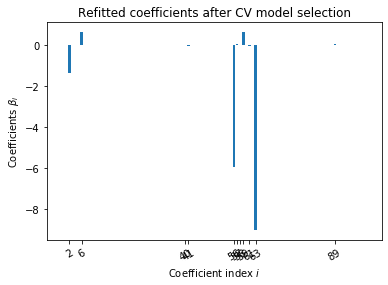

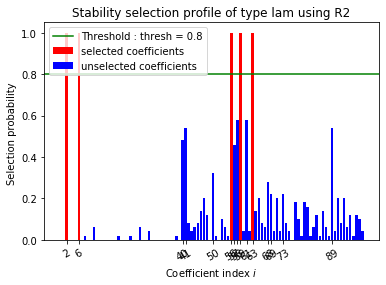

SELECTED VARIABLES : 
2
6
56
59
63


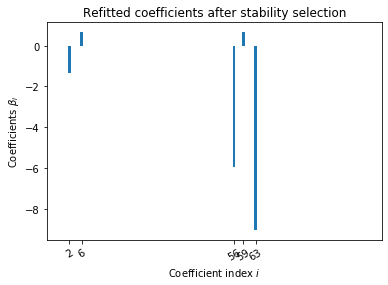

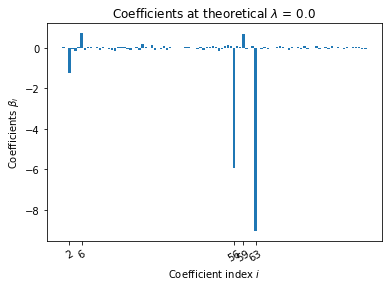

Running time : 
Running time for Path computation    : 1.259s
Running time for Cross Validation    : 4.615s
Running time for Stability Selection : 5.633s
Running time for Fixed LAM           : 0.011s


In [21]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(ratio_mse_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(ratio_mse_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(ratio_mse_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [22]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'


problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '


## R3

In [23]:
problem1.formulation.concomitant = True
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = False
problem3.formulation.classification = False

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 5
     lamin = 0.001
     n_lam = 80
     numerical_method = Path-Alg
 
STABILITY SELECTION PARAMETERS: 
     method = first
     lamin = 0.01
     lam = theoretical
     Nlam = 80
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = theoretical
     theoretical_lam = 24.421
     numerical_method = Path-Alg
 
PATH PARAMETERS: 
     Npath = 50
     n_active = 20
     lamin = 0.001
     numerical_method = Path-Alg



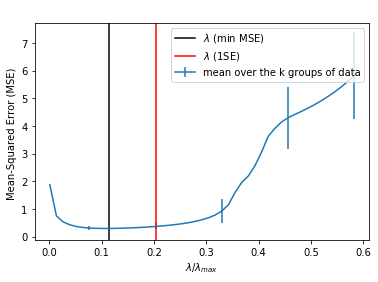

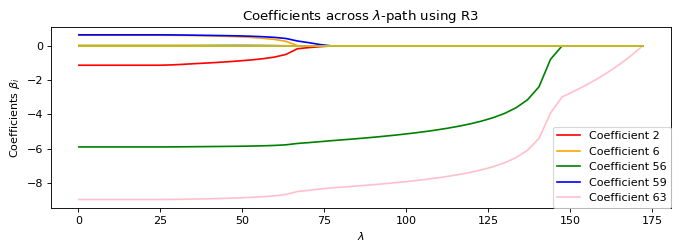

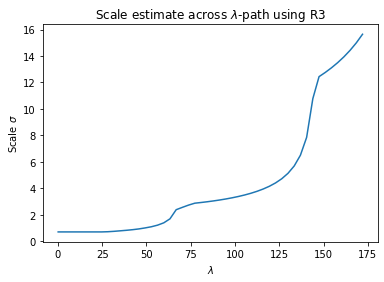

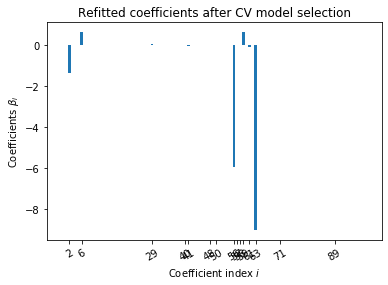

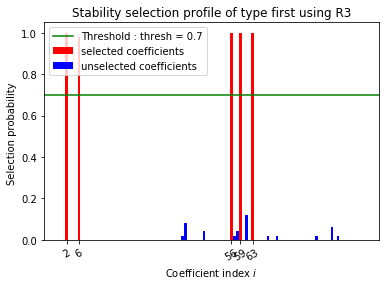

SELECTED VARIABLES : 
2
6
56
59
63


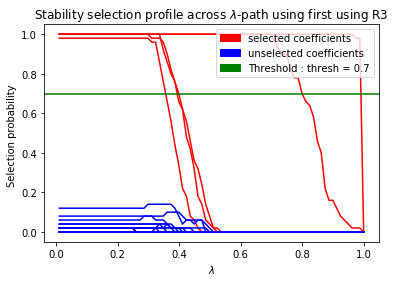

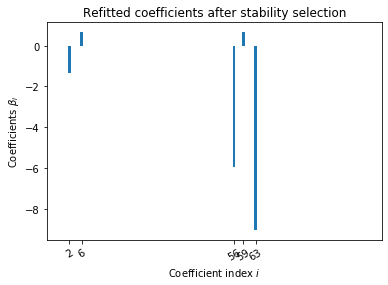

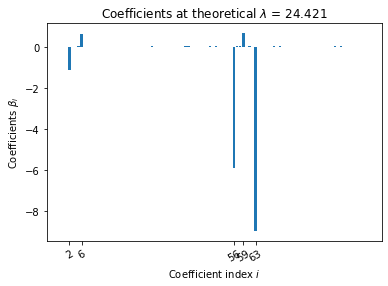

SIGMA FOR LAMFIXED  :  0.96286313325985
Running time : 
Running time for Path computation    : 0.016s
Running time for Cross Validation    : 0.638s
Running time for Stability Selection : 0.705s
Running time for Fixed LAM           : 0.017s
 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 7
     lamin = 0.001
     n_lam = 80
     numerical_method = Path-Alg
 
STABILITY SELECTION PARAMETERS: 
     method = max
     lamin = 0.01
     lam = theoretical
     Nlam = 80
     B = 70
     q = 20
     percent_nS = 0.8
     threshold = 0.5
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = 0.1
     theoretical_lam = 0.1628
     numerical_method = DR
 
PATH PARAMETERS: 
     Npath = 50
     n_active = 0
     lamin = 0.1
     numerical_method = Path-Alg



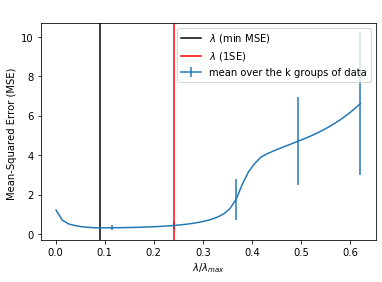

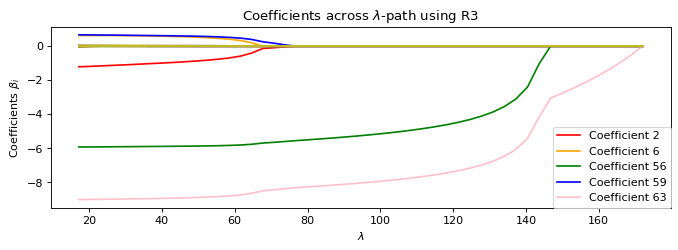

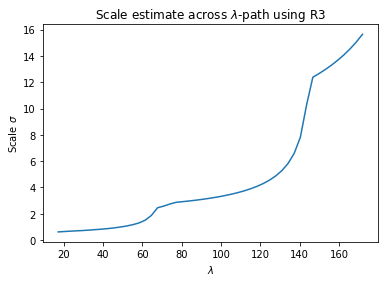

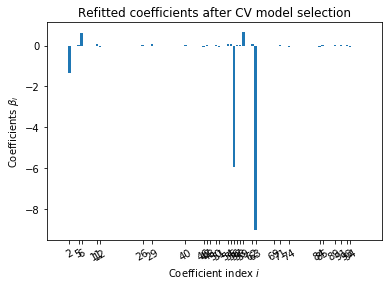

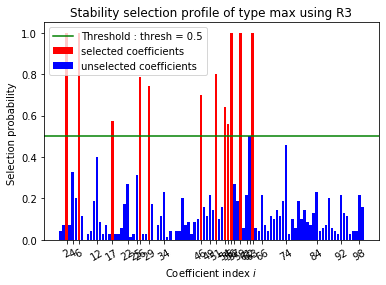

SELECTED VARIABLES : 
2
6
17
26
29
46
51
54
55
56
59
63


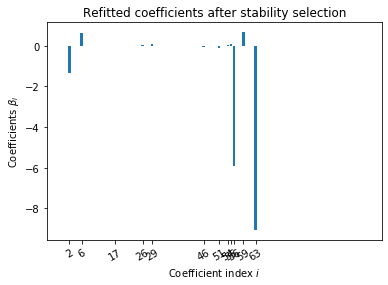

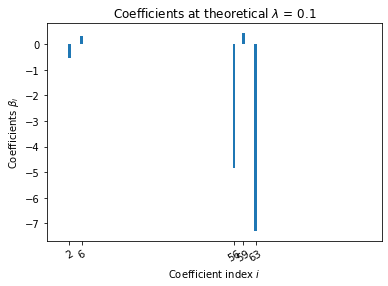

SIGMA FOR LAMFIXED  :  6.772657719936005
Running time : 
Running time for Path computation    : 0.026s
Running time for Cross Validation    : 0.943s
Running time for Stability Selection : 6.699s
Running time for Fixed LAM           : 0.463s
 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Path
     Cross Validation
     Stability selection
     Lambda fixed
 
CROSS VALIDATION PARAMETERS: 
     Nsubset = 3
     lamin = 0.1
     n_lam = 20
     numerical_method = Path-Alg
 
STABILITY SELECTION PARAMETERS: 
     method = lam
     lamin = 1.0
     lam = theoretical
     Nlam = 80
     B = 50
     q = 1000
     percent_nS = 0.4
     threshold = 0.8
     numerical_method = Path-Alg
 
LAMBDA FIXED PARAMETERS: 
     lam = 0.0
     theoretical_lam = 24.421
     numerical_method = Path-Alg
 
PATH PARAMETERS: 
     Npath = 20
     n_active = 0
     lamin = 0.1
     numerical_method = DR



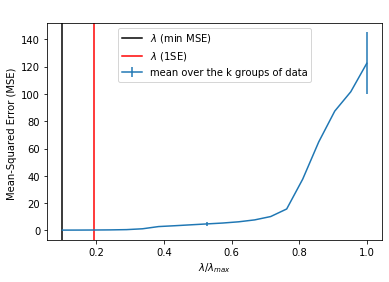

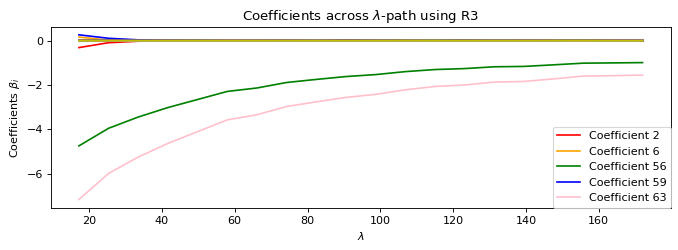

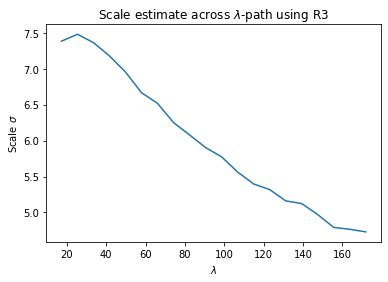

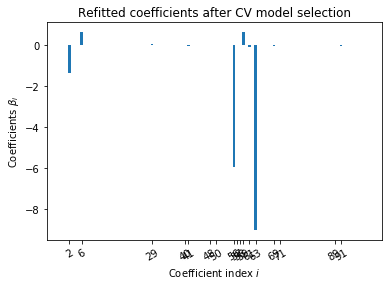

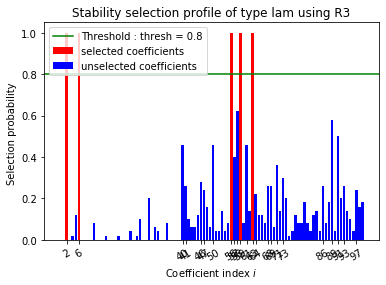

SELECTED VARIABLES : 
2
6
56
59
63


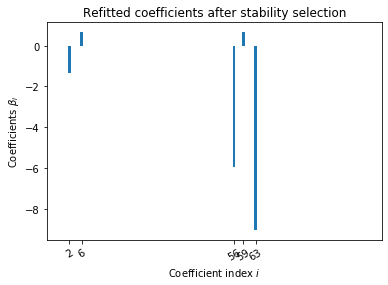

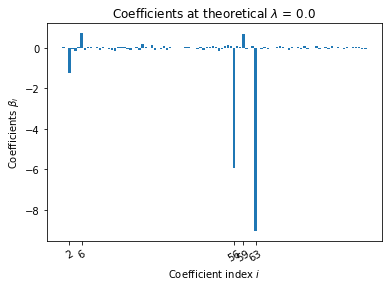

SIGMA FOR LAMFIXED  :  0.5942421427297521
Running time : 
Running time for Path computation    : 1.04s
Running time for Cross Validation    : 0.064s
Running time for Stability Selection : 0.435s
Running time for Fixed LAM           : 0.001s


In [24]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(ratio_mse_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(ratio_mse_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(ratio_mse_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [25]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

## R4

In [26]:
problem1.formulation.concomitant = True
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = True
problem3.formulation.classification = False

In [ ]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(ratio_mse_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(ratio_mse_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(ratio_mse_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [ ]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## C1

In [ ]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = True
problem1.data.y = np.sign(problem1.data.y)

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = True
problem2.data.y = np.sign(problem2.data.y)

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = True
problem3.data.y = np.sign(problem3.data.y)

In [ ]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(ratio_mse_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(ratio_mse_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(ratio_mse_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [ ]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## C2

In [ ]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = True

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = True

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = True

In [ ]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(ratio_mse_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(ratio_mse_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(ratio_mse_max = 10.)
print(problem3.solution)